# Librerias


In [2]:
# Librerias

import pandas as pd
from pandas import DataFrame
from pandas import concat
from pandas import Series
import numpy as np
import datetime as dt
import matplotlib.pyplot as plt
import math
#from math import sqrt
from numpy import concatenate

import seaborn as sns

# Librerias para evaluación 

from sklearn.metrics import mean_squared_error, mean_absolute_error, accuracy_score,r2_score
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder

# Librerias para construir los modelos

import tensorflow as tf
from keras.models import Sequential
from keras.layers import Bidirectional
from keras.layers import LSTM
from keras.layers import Dense
from keras.layers import Dropout

# Analisis exploratorio

In [3]:
dfLecturas = pd.read_csv('Glucose Level - T1D - FreeStyle Libre.csv',dtype={"ID":"string","Glucose level":int},parse_dates=True)

In [4]:
dfLecturas.shape

(3000001, 3)

In [5]:
dfLecturas.head()

,ID,Date,Glucose level
0,LIB193263,2020-06-09 19:08:00,99
1,LIB193263,2020-06-09 19:23:00,92
2,LIB193263,2020-06-09 19:38:00,86
3,LIB193263,2020-06-09 19:53:00,85
4,LIB193263,2020-06-09 20:08:00,85


In [6]:
dfLecturas.tail()

,ID,Date,Glucose level
2999996,LIB193399,2020-10-20 20:50:00,83
2999997,LIB193399,2020-10-20 21:05:00,76
2999998,LIB193399,2020-10-20 21:20:00,67
2999999,LIB193399,2020-10-20 21:35:00,63
3000000,LIB193399,2020-10-20 21:50:00,63


In [7]:
dfLecturas.dtypes

ID               string
Date             object
Glucose level     int64
dtype: object

In [8]:
print(dfLecturas["ID"].unique())

<StringArray>
['LIB193263', 'LIB193264', 'LIB193265', 'LIB193266', 'LIB193267', 'LIB193268',
 'LIB193269', 'LIB193270', 'LIB193271', 'LIB193272',
 ...
 'LIB193389', 'LIB193390', 'LIB193391', 'LIB193392', 'LIB193393', 'LIB193395',
 'LIB193396', 'LIB193397', 'LIB193398', 'LIB193399']
Length: 108, dtype: string


In [9]:
dfLecturas['Date'] =  pd.to_datetime(dfLecturas['Date'])

In [10]:
dfLecturas.dtypes

ID                       string
Date             datetime64[ns]
Glucose level             int64
dtype: object

In [11]:
dfLecturas.isnull().sum()

ID               0
Date             0
Glucose level    0
dtype: int64

In [12]:
print(pd.to_datetime(dfLecturas['Date'],errors='coerce'))

0         2020-06-09 19:08:00
1         2020-06-09 19:23:00
2         2020-06-09 19:38:00
3         2020-06-09 19:53:00
4         2020-06-09 20:08:00
                  ...        
2999996   2020-10-20 20:50:00
2999997   2020-10-20 21:05:00
2999998   2020-10-20 21:20:00
2999999   2020-10-20 21:35:00
3000000   2020-10-20 21:50:00
Name: Date, Length: 3000001, dtype: datetime64[ns]


In [13]:
dfLecturas['Date'].agg(['min', 'max'])

min   2016-10-05 08:47:00
max   2044-03-22 03:44:00
Name: Date, dtype: datetime64[ns]

In [14]:
dfindex = dfLecturas[ (dfLecturas['Date']<'2018-01-06 00:00:00') ].index
dfLecturas.drop(dfindex , inplace=True)
dfLecturas.reset_index()
indexAge = dfLecturas[ (dfLecturas['Date']>'2022-03-21 00:00:00') ].index
dfLecturas.drop(indexAge , inplace=True)
dfLecturas.reset_index()

,index,ID,Date,Glucose level
0,0,LIB193263,2020-06-09 19:08:00,99
1,1,LIB193263,2020-06-09 19:23:00,92
2,2,LIB193263,2020-06-09 19:38:00,86
3,3,LIB193263,2020-06-09 19:53:00,85
4,4,LIB193263,2020-06-09 20:08:00,85
...,...,...,...,...
2969675,2999996,LIB193399,2020-10-20 20:50:00,83
2969676,2999997,LIB193399,2020-10-20 21:05:00,76
2969677,2999998,LIB193399,2020-10-20 21:20:00,67
2969678,2999999,LIB193399,2020-10-20 21:35:00,63


In [15]:
dfLecturas['Date'].agg(['min', 'max'])

min   2018-01-06 00:31:00
max   2022-03-20 23:58:00
Name: Date, dtype: datetime64[ns]

In [16]:
dfLecturas.shape

(2969680, 3)

In [17]:
df_sort = dfLecturas.pivot_table(columns=['ID'], aggfunc='size')
df_sort.sort_values()

ID
LIB193321         2
LIB193365      1057
LIB193283      1098
LIB193398      1253
LIB193366      1287
              ...  
LIB193367     76925
LIB193309     77289
LIB193307    104058
LIB193385    114107
LIB193277    114598
Length: 108, dtype: int64

# Analisis exploratorio

Estos parecen los que tienen mas registros

LIB193310     (71772) 

*   LIB193310	2020-02-13 17:54:00	2022-03-18 16:54:00

LIB193269     (71881)
* LIB193269	2019-02-13 06:36:00	2022-03-17 17:32:00

LIB193367     (76925)
* LIB193367	2020-01-27 18:51:00	2022-03-15 12:46:00

LIB193309     (77289)
* LIB193309	2018-07-12 12:19:00	2022-03-17 08:50:00

LIB193307    (104058)
* LIB193307	2018-11-04 21:10:00	2022-03-17 20:14:00

LIB193385    (114107)
* LIB193385	2018-02-21 19:46:00	2022-03-18 09:43:00

LIB193277    (114598)
* LIB193277	2018-06-12 20:18:00	2022-03-18 11:59:00

In [18]:
dfLecturas.groupby('ID')['Date'].agg([('Start_Date', 'min'), ('End_Date', 'max')])

,Start_Date,End_Date
ID,,
LIB193263,2020-06-09 19:08:00,2022-03-19 07:32:00
LIB193264,2020-06-10 00:54:00,2022-03-19 11:56:00
LIB193265,2019-01-27 10:52:00,2022-03-19 22:04:00
LIB193266,2020-10-08 18:03:00,2022-03-17 18:22:00
LIB193267,2020-06-09 19:07:00,2022-03-17 20:15:00
...,...,...
LIB193395,2018-08-19 09:24:00,2022-02-04 09:40:00
LIB193396,2021-06-16 11:20:00,2021-07-22 10:56:00
LIB193397,2018-06-06 11:38:00,2022-02-28 11:44:00


In [19]:
dfLecturas.shape

(2969680, 3)

# Variables a partir de la fecha

In [20]:
dfPrimerEscenario = dfLecturas.copy()
dfSegundoEscenario = dfLecturas.copy()

def estacionMetereologica(date):
    ''' date -> datetime object  '''
    md = pd.to_datetime(date).month * 100 + pd.to_datetime(date).day

    if ((md > 320) and (md < 621)):
        s = 'Primavera' #primavera
    elif ((md > 620) and (md < 923)):
        s = 'Verano' #verano
    elif ((md > 922) and (md < 1223)):
        s = 'Otono' #otoño 
    else:
        s = 'Invierno' #invierno
    return s

def momentoDelDia(time):
    if (time>=0) & (time<6):
        tod = 'Madrugada' #madrugada'
    elif (time>=6) & (time<12):
        tod = 'Manana' #manana
    elif (time>=12) & (time<18):
        tod = 'Tarde' #tarde
    else:
        tod = 'Noche' #noche
    return tod

#dfSegundoEscenario['Estacion'] = dfSegundoEscenario.Date.map(estacionMetereologica)
dfSegundoEscenario['TimeOfDay'] = dfSegundoEscenario.Date.dt.hour.map(momentoDelDia) 
#dfSegundoEscenario['DiaSemana'] = pd.to_datetime(dfSegundoEscenario.Date).dt.strftime('%A')
#dfSegundoEscenario['Mes'] = pd.to_datetime(dfSegundoEscenario.Date).dt.strftime('%b')
#dfSegundoEscenario.head()

In [21]:
#dfSegundoEscenario = dfSegundoEscenario.set_index('Date')
dfSegundoEscenario['hour'] = dfSegundoEscenario['Date'].dt.hour
dfSegundoEscenario['dayofweek'] = dfSegundoEscenario['Date'].dt.dayofweek
dfSegundoEscenario['quarter'] = dfSegundoEscenario['Date'].dt.quarter
dfSegundoEscenario['month'] = dfSegundoEscenario['Date'].dt.month
dfSegundoEscenario['year'] = dfSegundoEscenario['Date'].dt.year
dfSegundoEscenario['dayofyear'] = dfSegundoEscenario['Date'].dt.dayofyear
dfSegundoEscenario['dayofmonth'] = dfSegundoEscenario['Date'].dt.day
dfSegundoEscenario['weekofyear'] = dfSegundoEscenario['Date'].dt.isocalendar().week
dfSegundoEscenario.reset_index()
dfSegundoEscenario

,ID,Date,Glucose level,TimeOfDay,hour,dayofweek,quarter,month,year,dayofyear,dayofmonth,weekofyear
0,LIB193263,2020-06-09 19:08:00,99,Noche,19,1,2,6,2020,161,9,24
1,LIB193263,2020-06-09 19:23:00,92,Noche,19,1,2,6,2020,161,9,24
2,LIB193263,2020-06-09 19:38:00,86,Noche,19,1,2,6,2020,161,9,24
3,LIB193263,2020-06-09 19:53:00,85,Noche,19,1,2,6,2020,161,9,24
4,LIB193263,2020-06-09 20:08:00,85,Noche,20,1,2,6,2020,161,9,24
...,...,...,...,...,...,...,...,...,...,...,...,...
2999996,LIB193399,2020-10-20 20:50:00,83,Noche,20,1,4,10,2020,294,20,43
2999997,LIB193399,2020-10-20 21:05:00,76,Noche,21,1,4,10,2020,294,20,43
2999998,LIB193399,2020-10-20 21:20:00,67,Noche,21,1,4,10,2020,294,20,43
2999999,LIB193399,2020-10-20 21:35:00,63,Noche,21,1,4,10,2020,294,20,43


In [22]:
dfSegundoEscenario.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2969680 entries, 0 to 3000000
Data columns (total 12 columns):
 #   Column         Dtype         
---  ------         -----         
 0   ID             string        
 1   Date           datetime64[ns]
 2   Glucose level  int64         
 3   TimeOfDay      object        
 4   hour           int64         
 5   dayofweek      int64         
 6   quarter        int64         
 7   month          int64         
 8   year           int64         
 9   dayofyear      int64         
 10  dayofmonth     int64         
 11  weekofyear     UInt32        
dtypes: UInt32(1), datetime64[ns](1), int64(8), object(1), string(1)
memory usage: 286.0+ MB


# Conjuntos de datos

## Primer escenario

In [23]:
dfLIB193277Test = dfPrimerEscenario.copy()
indexAge = dfPrimerEscenario[~dfPrimerEscenario['ID'].isin(['LIB193277'])].index
dfLIB193277Test.drop(indexAge , inplace=True)
indexAge = dfLIB193277Test[ (dfLIB193277Test['Date']<'2021-10-18 01:00:00') ].index
dfLIB193277Test.drop(indexAge , inplace=True)
indexAge = dfLIB193277Test[ (dfLIB193277Test['Date']>'2021-10-25 02:00:00') ].index
dfLIB193277Test.drop(indexAge , inplace=True)
dfLIB193277Test.drop('ID', inplace=True, axis=1)
dfLIB193277Test = dfLIB193277Test.set_index('Date')

dfLIB193307Test = dfPrimerEscenario.copy()
indexAge = dfPrimerEscenario[~dfPrimerEscenario['ID'].isin(['LIB193307'])].index
dfLIB193307Test.drop(indexAge , inplace=True)
indexAge = dfLIB193307Test[ (dfLIB193307Test['Date']<'2021-10-18 01:00:00') ].index
dfLIB193307Test.drop(indexAge , inplace=True)
indexAge = dfLIB193307Test[ (dfLIB193307Test['Date']>'2021-10-25 02:00:00') ].index
dfLIB193307Test.drop(indexAge , inplace=True)
dfLIB193307Test.drop('ID', inplace=True, axis=1)
dfLIB193307Test = dfLIB193307Test.set_index('Date')

dfLIB193310Test = dfPrimerEscenario.copy()
indexAge = dfPrimerEscenario[~dfPrimerEscenario['ID'].isin(['LIB193310'])].index
dfLIB193310Test.drop(indexAge , inplace=True)
indexAge = dfLIB193310Test[ (dfLIB193310Test['Date']<'2021-10-18 01:00:00') ].index
dfLIB193310Test.drop(indexAge , inplace=True)
indexAge = dfLIB193310Test[ (dfLIB193310Test['Date']>'2021-10-25 02:00:00') ].index
dfLIB193310Test.drop(indexAge , inplace=True)
dfLIB193310Test.drop('ID', inplace=True, axis=1)
dfLIB193310Test = dfLIB193310Test.set_index('Date')

## Gráficos

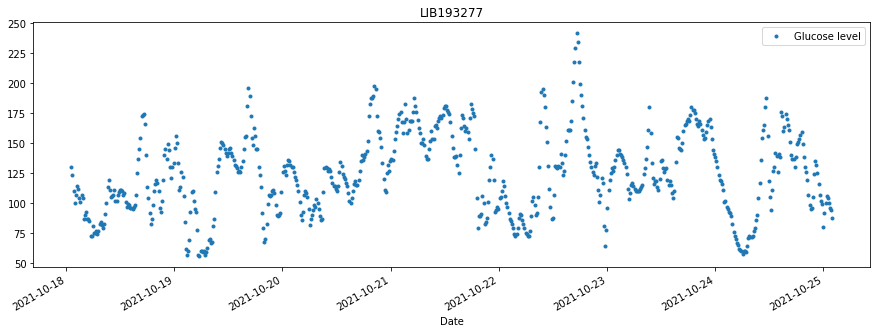

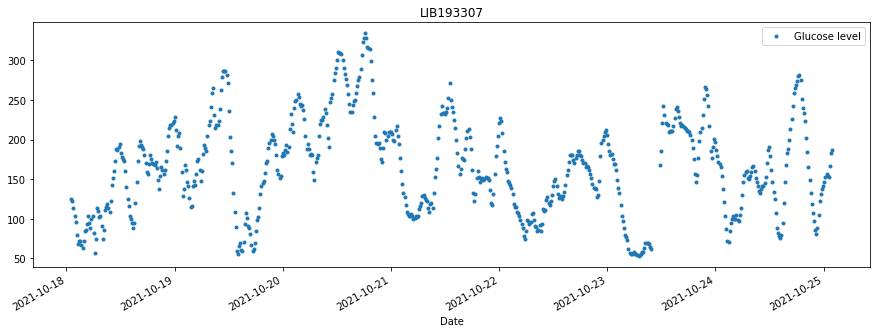

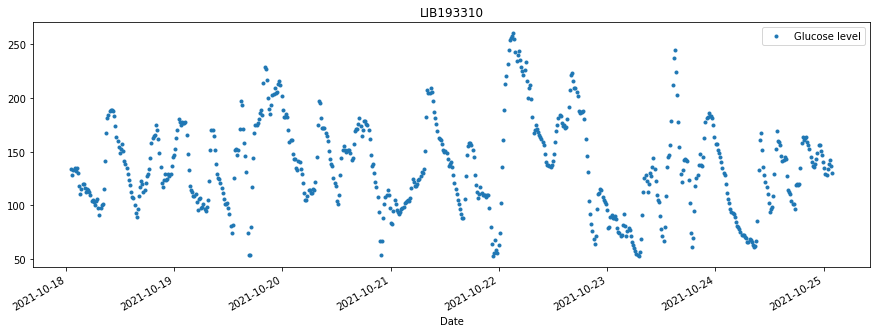

In [24]:
color_pal = sns.color_palette()
dfLIB193277Test.plot(style='.',
        figsize=(15, 5),
        color=color_pal[0],
        title='LIB193277')
plt.show()
dfLIB193307Test.plot(style='.',
        figsize=(15, 5),
        color=color_pal[0],
        title='LIB193307')
plt.show()
dfLIB193310Test.plot(style='.',
        figsize=(15, 5),
        color=color_pal[0],
        title='LIB193310')
plt.show()

## Segundo escenario

In [25]:
dfLIB193277Test2 = dfSegundoEscenario.copy()
indexAge = dfSegundoEscenario[~dfSegundoEscenario['ID'].isin(['LIB193277'])].index
dfLIB193277Test2.drop(indexAge , inplace=True)
indexAge = dfLIB193277Test2[ (dfLIB193277Test2['Date']<'2021-10-18 01:00:00') ].index
dfLIB193277Test2.drop(indexAge , inplace=True)
indexAge = dfLIB193277Test2[ (dfLIB193277Test2['Date']>'2021-10-25 02:00:00') ].index
dfLIB193277Test2.drop(indexAge , inplace=True)
dfLIB193277Test2.drop('ID', inplace=True, axis=1)
dfLIB193277Test2 = dfLIB193277Test2.set_index('Date')

dfLIB193307Test2 = dfSegundoEscenario.copy()
indexAge = dfSegundoEscenario[~dfSegundoEscenario['ID'].isin(['LIB193307'])].index
dfLIB193307Test2.drop(indexAge , inplace=True)
indexAge = dfLIB193307Test2[ (dfLIB193307Test2['Date']<'2021-10-18 01:00:00') ].index
dfLIB193307Test2.drop(indexAge , inplace=True)
indexAge = dfLIB193307Test2[ (dfLIB193307Test2['Date']>'2021-10-25 02:00:00') ].index
dfLIB193307Test2.drop(indexAge , inplace=True)
dfLIB193307Test2.drop('ID', inplace=True, axis=1)
dfLIB193307Test2 = dfLIB193307Test2.set_index('Date')

dfLIB193310Test2 = dfSegundoEscenario.copy()
indexAge = dfSegundoEscenario[~dfSegundoEscenario['ID'].isin(['LIB193310'])].index
dfLIB193310Test2.drop(indexAge , inplace=True)
indexAge = dfLIB193310Test2[ (dfLIB193310Test2['Date']<'2021-10-18 01:00:00') ].index
dfLIB193310Test2.drop(indexAge , inplace=True)
indexAge = dfLIB193310Test2[ (dfLIB193310Test2['Date']>'2021-10-25 02:00:00') ].index
dfLIB193310Test2.drop(indexAge , inplace=True)
dfLIB193310Test2.drop('ID', inplace=True, axis=1)
dfLIB193310Test2 = dfLIB193310Test2.set_index('Date')

# Modelos RN

In [26]:
def lstmModel(X_train, y_train,WT,WP,training_set_scaled,test_set):
  Model_P = Sequential()
  Model_P.add(LSTM(units = 60, return_sequences = True, input_shape = (X_train.shape[1],1)))
  Model_P.add(Dropout(0.2))
  Model_P.add(LSTM(units = 60, return_sequences = True))
  Model_P.add(Dropout(0.2))
  Model_P.add(LSTM(units = 60, return_sequences = True))
  Model_P.add(Dropout(0.2))
  Model_P.add(LSTM(units = 60))
  Model_P.add(Dropout(0.2))
  Model_P.add(Dense(units = 1))
  Model_P.compile(optimizer = 'adam', loss = 'mean_squared_error')
  Model_P.fit(X_train, y_train, epochs = 60, batch_size = 32)
  plt.plot(range(len(Model_P.history.history['loss'])),Model_P.history.history['loss'] )
  plt.xlabel('Epoch Number')
  plt.ylabel('Loss')
  plt.show()

  prediction_test = []

  Batch_one = training_set_scaled[-WT:]
  Batch_New = Batch_one.reshape((1,WT,1))

  for i in range(WP):      
      First_Pred = Model_P.predict(Batch_New)[0]      
      prediction_test.append(First_Pred)      
      Batch_New = np.append(Batch_New[:,1:,:], [[First_Pred]], axis = 1)      

  prediction_test = np.array(prediction_test)
  predictions =sc.inverse_transform(prediction_test)

  plt.plot(test_set, color = 'red', label = 'Valor actual')
  plt.plot(predictions, color = 'blue', label = 'Valor predicho')
  plt.title('Predicción de nivel de glucosa')
  plt.xlabel('Hora (intervalos 15 min)')
  plt.ylabel('Nivel de glucosa')
  plt.legend()
  plt.show()

  RMSE = math.sqrt(mean_squared_error(test_set, predictions))
  Rsquare = r2_score(test_set, predictions)
  print (f'RMSE-->{RMSE} Rsquare-->{Rsquare}\n')

def lstmBidirectionalModel(X_train, y_train,WT,WP,training_set_scaled,test_set):
  Model_P = Sequential()
  Model_P.add(Bidirectional(LSTM(units = 60, return_sequences = True, input_shape = (X_train.shape[1],1))))
  Model_P.add(Dropout(0.2))
  Model_P.add(Bidirectional(LSTM(units = 60, return_sequences = True)))
  Model_P.add(Dropout(0.2))
  Model_P.add(Bidirectional(LSTM(units = 60, return_sequences = True)))
  Model_P.add(Dropout(0.2))
  Model_P.add(Bidirectional(LSTM(units = 60)))
  Model_P.add(Dropout(0.2))
  Model_P.add(Dense(units = 1))
  Model_P.compile(optimizer = 'adam', loss = 'mean_squared_error')
  Model_P.fit(X_train, y_train, epochs = 60, batch_size = 32)  
  plt.plot(range(len(Model_P.history.history['loss'])),Model_P.history.history['loss'] )
  plt.xlabel('Epoch Number')
  plt.ylabel('Loss')
  plt.show()

  prediction_test = []

  Batch_one = training_set_scaled[-WT:]
  Batch_New = Batch_one.reshape((1,WT,1))

  for i in range(WP):    
      First_Pred = Model_P.predict(Batch_New)[0]    
      prediction_test.append(First_Pred)    
      Batch_New = np.append(Batch_New[:,1:,:], [[First_Pred]], axis = 1)    

  prediction_test = np.array(prediction_test)
  predictions = sc.inverse_transform(prediction_test)

  plt.plot(test_set, color = 'red', label = 'Valor actual')
  plt.plot(predictions, color = 'blue', label = 'Valor predicho')
  plt.title('Predicción de nivel de glucosa')
  plt.xlabel('Hora (intervalos 15 min)')
  plt.ylabel('Nivel de glucosa')
  plt.legend()
  plt.show()

  RMSE = math.sqrt(mean_squared_error(test_set, predictions))
  Rsquare = r2_score(test_set, predictions)
  print (f'RMSE-->{RMSE} Rsquare-->{Rsquare}\n')

In [27]:
def mean_absolute_percentage_error (y_true, y_pred):
  y_true, y_pred = np.array(y_true), np.array(y_pred)
  return np.mean(np.abs((y_true - y_pred)/y_true)) * 100

def lstmMVModel(X_train, y_train,training_set,training_set_scaled,WT,WP,test_set_scaled,test_set):
  Model = Sequential()
  Model.add(LSTM(units = 60, return_sequences = True, input_shape = (X_train.shape[1], 10)))
  Model.add(Dropout(0.2))
  Model.add(LSTM(units = 60, return_sequences = True))
  Model.add(Dropout(0.2))
  Model.add(LSTM(units = 60, return_sequences = True))
  Model.add(Dropout(0.2))
  Model.add(LSTM(units = 60))
  Model.add(Dropout(0.2))
  Model.add(Dense(units = 1))
  Model.compile(optimizer = 'adam', loss = 'mean_squared_error')
  Model.fit(X_train,y_train, epochs = 60, batch_size = 32)

  plt.plot(range(len(Model.history.history['loss'])), Model.history.history['loss'])
  plt.xlabel('Epoch Number')
  plt.ylabel('Loss')
  plt.show()
  prediction_test = []

  Batch_one = training_set_scaled[-WT:]
  Batch_New = Batch_one.reshape((1,WT,-1))

  for i in range(WP):    
      First_pred = Model.predict(Batch_New)[0]   
      #print (First_pred) 
      prediction_test.append(First_pred)        
      New_var = test_set_scaled[i,:]    
      New_var = New_var.reshape(1,-1)    
      New_test = np.insert(New_var, -1, [First_pred], axis =1)    
      New_test = New_test.reshape(1,1,-1)    
      Batch_New = np.append(Batch_New[:,1:,:], New_test, axis=1)    
  prediction_test = np.array(prediction_test)

  SI = MinMaxScaler(feature_range = (0,1))
  y_Scale = training_set[:,9:10]
  SI.fit_transform(y_Scale)

  predictions = SI.inverse_transform(prediction_test)
  real_values = test_set[:, 9]

  plt.plot(real_values, color = 'red', label = 'Valor actual')
  plt.plot(predictions, color = 'blue', label = 'Valor predicho')
  plt.title('Predicción de nivel de glucosa')
  plt.xlabel('Hora (intervalos 15 min)')
  plt.ylabel('Nivel de glucosa')
  plt.legend()
  plt.show()

  RMSE = math.sqrt(mean_squared_error(real_values,predictions))
  MAPE = mean_absolute_percentage_error(real_values,predictions)
  print (f'MAPE-->{MAPE} RMSE-->{RMSE}\n')

def lstmMVBidirectionalModel(X_train, y_train,training_set,training_set_scaled,WT,WP,test_set_scaled,test_set):
  Model = Sequential()
  Model.add(Bidirectional(LSTM(units = 60, return_sequences = True, input_shape = (X_train.shape[1], 10))))
  Model.add(Dropout(0.2))
  Model.add(Bidirectional(LSTM(units = 60, return_sequences = True)))
  Model.add(Dropout(0.2))
  Model.add(Bidirectional(LSTM(units = 60, return_sequences = True)))
  Model.add(Dropout(0.2))
  Model.add(Bidirectional(LSTM(units = 60)))
  Model.add(Dropout(0.2))
  Model.add(Dense(units = 1))
  Model.compile(optimizer = 'adam', loss = 'mean_squared_error')
  Model.fit(X_train,y_train, epochs = 60, batch_size = 32)

  plt.plot(range(len(Model.history.history['loss'])), Model.history.history['loss'])
  plt.xlabel('Epoch Number')
  plt.ylabel('Loss')
  plt.show()

  prediction_test = []

  Batch_one = training_set_scaled[-WT:]
  Batch_New = Batch_one.reshape((1,WT,-1))

  for i in range(WP):    
      First_pred = Model.predict(Batch_New)[0]   
      #print (First_pred) 
      prediction_test.append(First_pred)        
      New_var = test_set_scaled[i,:]    
      New_var = New_var.reshape(1,-1)    
      New_test = np.insert(New_var, -1, [First_pred], axis =1)    
      New_test = New_test.reshape(1,1,-1)    
      Batch_New = np.append(Batch_New[:,1:,:], New_test, axis=1)    
  prediction_test = np.array(prediction_test)

  SI = MinMaxScaler(feature_range = (0,1))
  y_Scale = training_set[:,9:10]
  SI.fit_transform(y_Scale)

  predictions = SI.inverse_transform(prediction_test)
  real_values = test_set[:, 9]

  plt.plot(real_values, color = 'red', label = 'Valor actual')
  plt.plot(predictions, color = 'blue', label = 'Valor predicho')
  plt.title('Predicción de nivel de glucosa')
  plt.xlabel('Hora (intervalos 15 min)')
  plt.ylabel('Nivel de glucosa')
  plt.legend()
  plt.show()

  RMSE = math.sqrt(mean_squared_error(real_values,predictions))
  MAPE = mean_absolute_percentage_error(real_values,predictions)
  print (f'MAPE-->{MAPE} RMSE-->{RMSE}\n')

# LIB193310 Primer escenario

## 2 horas

Epoch 1/60
21/21 [==============================] - 7s 28ms/step - loss: 0.0752
Epoch 2/60
21/21 [==============================] - 1s 29ms/step - loss: 0.0400
Epoch 3/60
21/21 [==============================] - 1s 30ms/step - loss: 0.0382
Epoch 4/60
21/21 [==============================] - 1s 28ms/step - loss: 0.0368
Epoch 5/60
21/21 [==============================] - 1s 27ms/step - loss: 0.0339
Epoch 6/60
21/21 [==============================] - 1s 30ms/step - loss: 0.0300
Epoch 7/60
21/21 [==============================] - 1s 30ms/step - loss: 0.0284
Epoch 8/60
21/21 [==============================] - 1s 28ms/step - loss: 0.0252
Epoch 9/60
21/21 [==============================] - 1s 28ms/step - loss: 0.0255
Epoch 10/60
21/21 [==============================] - 1s 29ms/step - loss: 0.0230
Epoch 11/60
21/21 [==============================] - 1s 29ms/step - loss: 0.0221
Epoch 12/60
21/21 [==============================] - 1s 29ms/step - loss: 0.0201
Epoch 13/60
21/21 [==================

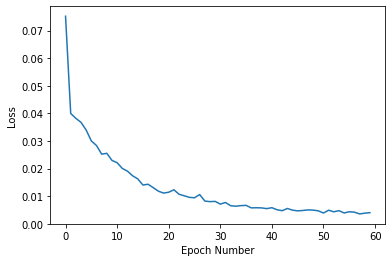

1/1 [==============================] - 0s 24ms/step


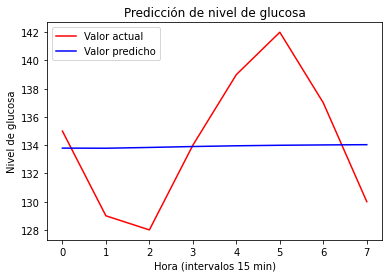

RMSE-->4.6523825417584606 Rsquare-->0.013348680804151969

**********lstmBidirectionalModel**************
Epoch 1/60
21/21 [==============================] - 14s 47ms/step - loss: 0.0561
Epoch 2/60
21/21 [==============================] - 1s 48ms/step - loss: 0.0275
Epoch 3/60
21/21 [==============================] - 1s 51ms/step - loss: 0.0212
Epoch 4/60
21/21 [==============================] - 1s 49ms/step - loss: 0.0163
Epoch 5/60
21/21 [==============================] - 1s 48ms/step - loss: 0.0133
Epoch 6/60
21/21 [==============================] - 1s 50ms/step - loss: 0.0118
Epoch 7/60
21/21 [==============================] - 1s 51ms/step - loss: 0.0130
Epoch 8/60
21/21 [==============================] - 1s 48ms/step - loss: 0.0122
Epoch 9/60
21/21 [==============================] - 1s 50ms/step - loss: 0.0145
Epoch 10/60
21/21 [==============================] - 1s 48ms/step - loss: 0.0112
Epoch 11/60
21/21 [==============================] - 1s 48ms/step - loss: 0.0093
Epoch 12/60


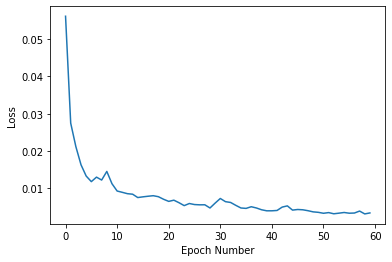

1/1 [==============================] - 0s 17ms/step


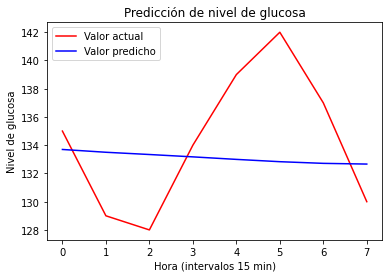

RMSE-->4.958912297222025 Rsquare-->-0.12094865739212879



In [28]:
#34304(total rows) - 8(values to predict)= 3496
# 674 - 8
training_set = dfLIB193310Test.iloc[:666,].values
test_set = dfLIB193310Test.iloc[666:,].values

sc = MinMaxScaler(feature_range = (0,1))

training_set_scaled = sc.fit_transform(training_set)
test_set_scaled = sc.fit_transform(test_set)

X_train = []
y_train = []
WT = 16
WP = 8

for i in range(WT, len(training_set_scaled)):
    X_train.append(training_set_scaled[i-WT:i, 0:1])
    y_train.append(training_set_scaled[i, 0])
    
X_train, y_train = np.array(X_train), np.array(y_train)

lstmModel(X_train, y_train,WT,WP,training_set_scaled,test_set)
print('**********lstmBidirectionalModel**************')
lstmBidirectionalModel(X_train, y_train,WT,WP,training_set_scaled,test_set)

## 30 minutos

Epoch 1/60
21/21 [==============================] - 7s 28ms/step - loss: 0.0759
Epoch 2/60
21/21 [==============================] - 1s 30ms/step - loss: 0.0398
Epoch 3/60
21/21 [==============================] - 1s 29ms/step - loss: 0.0391
Epoch 4/60
21/21 [==============================] - 1s 30ms/step - loss: 0.0366
Epoch 5/60
21/21 [==============================] - 1s 31ms/step - loss: 0.0365
Epoch 6/60
21/21 [==============================] - 1s 31ms/step - loss: 0.0329
Epoch 7/60
21/21 [==============================] - 1s 29ms/step - loss: 0.0304
Epoch 8/60
21/21 [==============================] - 1s 47ms/step - loss: 0.0300
Epoch 9/60
21/21 [==============================] - 1s 37ms/step - loss: 0.0271
Epoch 10/60
21/21 [==============================] - 1s 29ms/step - loss: 0.0237
Epoch 11/60
21/21 [==============================] - 1s 29ms/step - loss: 0.0220
Epoch 12/60
21/21 [==============================] - 1s 29ms/step - loss: 0.0216
Epoch 13/60
21/21 [==================

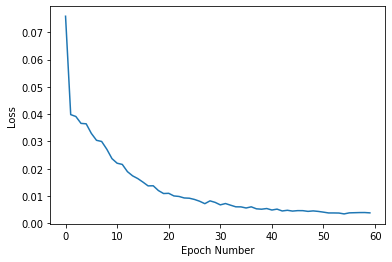

1/1 [==============================] - 0s 16ms/step


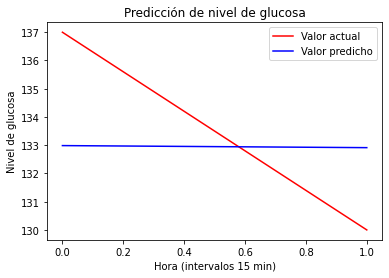

RMSE-->3.5070495192527162 Rsquare-->-0.00403235350944553

**********lstmBidirectionalModel**************
Epoch 1/60
21/21 [==============================] - 14s 47ms/step - loss: 0.0529
Epoch 2/60
21/21 [==============================] - 1s 49ms/step - loss: 0.0252
Epoch 3/60
21/21 [==============================] - 1s 51ms/step - loss: 0.0183
Epoch 4/60
21/21 [==============================] - 1s 48ms/step - loss: 0.0140
Epoch 5/60
21/21 [==============================] - 1s 47ms/step - loss: 0.0126
Epoch 6/60
21/21 [==============================] - 1s 51ms/step - loss: 0.0115
Epoch 7/60
21/21 [==============================] - 1s 48ms/step - loss: 0.0101
Epoch 8/60
21/21 [==============================] - 1s 50ms/step - loss: 0.0101
Epoch 9/60
21/21 [==============================] - 1s 49ms/step - loss: 0.0091
Epoch 10/60
21/21 [==============================] - 1s 48ms/step - loss: 0.0093
Epoch 11/60
21/21 [==============================] - 1s 50ms/step - loss: 0.0081
Epoch 12/60


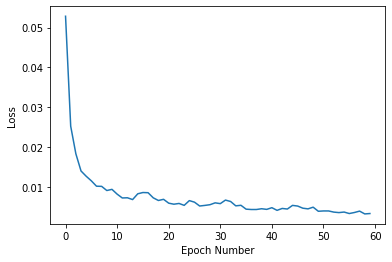

1/1 [==============================] - 0s 19ms/step


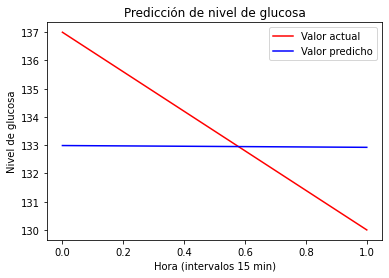

RMSE-->3.5107958184709958 Rsquare-->-0.0061785533872185106



In [29]:
#674 - 2 
training_set = dfLIB193310Test.iloc[:672,].values
test_set = dfLIB193310Test.iloc[672:,].values

sc = MinMaxScaler(feature_range = (0,1))

training_set_scaled = sc.fit_transform(training_set)
test_set_scaled = sc.fit_transform(test_set)

X_train = []
y_train = []
WT = 16
WP = 2

for i in range(WT, len(training_set_scaled)):
    X_train.append(training_set_scaled[i-WT:i, 0:1])
    y_train.append(training_set_scaled[i, 0])
    
X_train, y_train = np.array(X_train), np.array(y_train)  

lstmModel(X_train, y_train,WT,WP,training_set_scaled,test_set)
print('**********lstmBidirectionalModel**************')
lstmBidirectionalModel(X_train, y_train,WT,WP,training_set_scaled,test_set)

# LIB193310 Segundo escenario

## 2 horas

In [30]:
dfLIB193310Test2 = dfLIB193310Test2[['TimeOfDay', 'hour', 'dayofweek', 'quarter', 'month','year','dayofyear','dayofmonth','weekofyear','Glucose level']]
dfLIB193310Test2['TimeOfDay'] = LabelEncoder().fit_transform(dfLIB193310Test2['TimeOfDay'])

Epoch 1/60
21/21 [==============================] - 7s 28ms/step - loss: 0.0586
Epoch 2/60
21/21 [==============================] - 1s 58ms/step - loss: 0.0396
Epoch 3/60
21/21 [==============================] - 1s 41ms/step - loss: 0.0381
Epoch 4/60
21/21 [==============================] - 1s 43ms/step - loss: 0.0369
Epoch 5/60
21/21 [==============================] - 1s 57ms/step - loss: 0.0340
Epoch 6/60
21/21 [==============================] - 1s 30ms/step - loss: 0.0309
Epoch 7/60
21/21 [==============================] - 1s 29ms/step - loss: 0.0292
Epoch 8/60
21/21 [==============================] - 1s 29ms/step - loss: 0.0244
Epoch 9/60
21/21 [==============================] - 1s 28ms/step - loss: 0.0224
Epoch 10/60
21/21 [==============================] - 1s 32ms/step - loss: 0.0238
Epoch 11/60
21/21 [==============================] - 1s 29ms/step - loss: 0.0202
Epoch 12/60
21/21 [==============================] - 1s 30ms/step - loss: 0.0200
Epoch 13/60
21/21 [==================

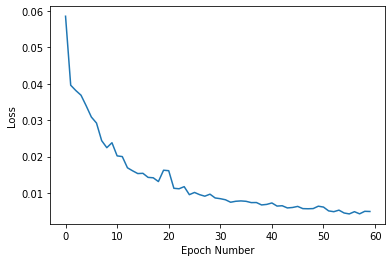

1/1 [==============================] - 0s 19ms/step


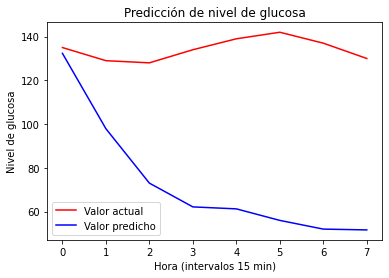

MAPE-->45.61401699608114 RMSE-->67.0910398411641

**********lstmBidirectionalModel**************

Epoch 1/60
21/21 [==============================] - 15s 50ms/step - loss: 0.0579
Epoch 2/60
21/21 [==============================] - 1s 50ms/step - loss: 0.0291
Epoch 3/60
21/21 [==============================] - 1s 49ms/step - loss: 0.0243
Epoch 4/60
21/21 [==============================] - 1s 51ms/step - loss: 0.0173
Epoch 5/60
21/21 [==============================] - 1s 49ms/step - loss: 0.0142
Epoch 6/60
21/21 [==============================] - 1s 52ms/step - loss: 0.0126
Epoch 7/60
21/21 [==============================] - 1s 49ms/step - loss: 0.0126
Epoch 8/60
21/21 [==============================] - 1s 52ms/step - loss: 0.0141
Epoch 9/60
21/21 [==============================] - 1s 49ms/step - loss: 0.0115
Epoch 10/60
21/21 [==============================] - 1s 49ms/step - loss: 0.0141
Epoch 11/60
21/21 [==============================] - 1s 50ms/step - loss: 0.0109
Epoch 12/60
21/21 [

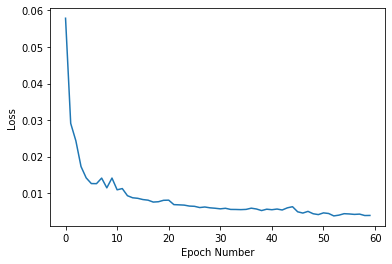

1/1 [==============================] - 0s 25ms/step


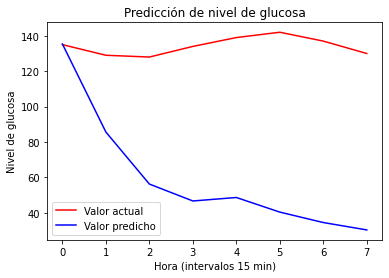

MAPE-->55.93525609139181 RMSE-->81.80006134531592



In [31]:
training_set = dfLIB193310Test2.iloc[:666,0:10].values
test_set = dfLIB193310Test2.iloc[666:,0:10].values

sc = MinMaxScaler(feature_range = (0,1))

training_set_scaled = sc.fit_transform(training_set)
test_set_scaled = sc.fit_transform(test_set)

test_set_scaled = test_set_scaled[:, 0:9]

X_train = []
y_train = []
WT = 16
WP = 8

for i in range(WT, len(training_set_scaled)):
    X_train.append(training_set_scaled[i-WT:i, 0:10])
    y_train.append(training_set_scaled[i,-1])
    
X_train, y_train = np.array(X_train), np.array(y_train)

X_train = np.reshape(X_train,(X_train.shape[0], X_train.shape[1], 10))

lstmMVModel(X_train, y_train,training_set,training_set_scaled,WT,WP,test_set_scaled,test_set)
print('**********lstmBidirectionalModel**************\n')
lstmMVBidirectionalModel(X_train, y_train,training_set,training_set_scaled,WT,WP,test_set_scaled,test_set)

## 30 minutos

Epoch 1/60
21/21 [==============================] - 7s 29ms/step - loss: 0.0577
Epoch 2/60
21/21 [==============================] - 1s 29ms/step - loss: 0.0392
Epoch 3/60
21/21 [==============================] - 1s 29ms/step - loss: 0.0369
Epoch 4/60
21/21 [==============================] - 1s 29ms/step - loss: 0.0353
Epoch 5/60
21/21 [==============================] - 1s 30ms/step - loss: 0.0311
Epoch 6/60
21/21 [==============================] - 1s 30ms/step - loss: 0.0296
Epoch 7/60
21/21 [==============================] - 1s 32ms/step - loss: 0.0249
Epoch 8/60
21/21 [==============================] - 1s 31ms/step - loss: 0.0249
Epoch 9/60
21/21 [==============================] - 1s 32ms/step - loss: 0.0226
Epoch 10/60
21/21 [==============================] - 1s 29ms/step - loss: 0.0192
Epoch 11/60
21/21 [==============================] - 1s 31ms/step - loss: 0.0195
Epoch 12/60
21/21 [==============================] - 1s 30ms/step - loss: 0.0185
Epoch 13/60
21/21 [==================

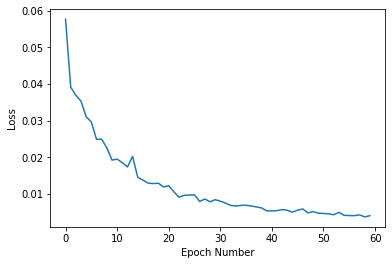

1/1 [==============================] - 0s 22ms/step


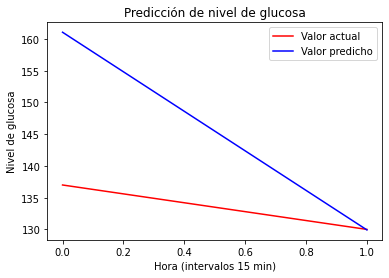

MAPE-->11.673974043060593 RMSE-->17.019122544843267

**********lstmBidirectionalModel**************

Epoch 1/60
21/21 [==============================] - 14s 52ms/step - loss: 0.0501
Epoch 2/60
21/21 [==============================] - 1s 50ms/step - loss: 0.0257
Epoch 3/60
21/21 [==============================] - 1s 63ms/step - loss: 0.0219
Epoch 4/60
21/21 [==============================] - 2s 80ms/step - loss: 0.0164
Epoch 5/60
21/21 [==============================] - 1s 51ms/step - loss: 0.0139
Epoch 6/60
21/21 [==============================] - 1s 52ms/step - loss: 0.0130
Epoch 7/60
21/21 [==============================] - 1s 52ms/step - loss: 0.0116
Epoch 8/60
21/21 [==============================] - 1s 52ms/step - loss: 0.0106
Epoch 9/60
21/21 [==============================] - 1s 51ms/step - loss: 0.0102
Epoch 10/60
21/21 [==============================] - 1s 52ms/step - loss: 0.0098
Epoch 11/60
21/21 [==============================] - 1s 50ms/step - loss: 0.0083
Epoch 12/60
21/2

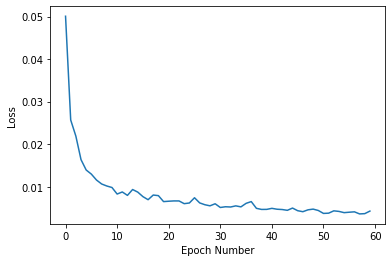

1/1 [==============================] - 0s 23ms/step


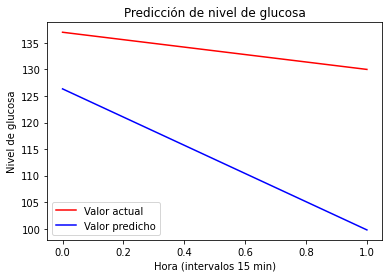

MAPE-->15.254891677762203 RMSE-->22.66195840177845



In [32]:
training_set = dfLIB193310Test2.iloc[:672,0:10].values
test_set = dfLIB193310Test2.iloc[672:,0:10].values

sc = MinMaxScaler(feature_range = (0,1))

training_set_scaled = sc.fit_transform(training_set)
test_set_scaled = sc.fit_transform(test_set)

test_set_scaled = test_set_scaled[:, 0:9]

X_train = []
y_train = []
WT = 16
WP = 2

for i in range(WT, len(training_set_scaled)):
    X_train.append(training_set_scaled[i-WT:i, 0:10])
    y_train.append(training_set_scaled[i,-1])
    
X_train, y_train = np.array(X_train), np.array(y_train)

X_train = np.reshape(X_train,(X_train.shape[0], X_train.shape[1], 10))

lstmMVModel(X_train, y_train,training_set,training_set_scaled,WT,WP,test_set_scaled,test_set)
print('**********lstmBidirectionalModel**************\n')
lstmMVBidirectionalModel(X_train, y_train,training_set,training_set_scaled,WT,WP,test_set_scaled,test_set)

# LIB193307 Primer escenario

## 2 horas

Epoch 1/60
21/21 [==============================] - 6s 29ms/step - loss: 0.0619
Epoch 2/60
21/21 [==============================] - 1s 30ms/step - loss: 0.0381
Epoch 3/60
21/21 [==============================] - 1s 31ms/step - loss: 0.0336
Epoch 4/60
21/21 [==============================] - 1s 30ms/step - loss: 0.0310
Epoch 5/60
21/21 [==============================] - 1s 30ms/step - loss: 0.0272
Epoch 6/60
21/21 [==============================] - 1s 30ms/step - loss: 0.0257
Epoch 7/60
21/21 [==============================] - 1s 29ms/step - loss: 0.0224
Epoch 8/60
21/21 [==============================] - 1s 32ms/step - loss: 0.0200
Epoch 9/60
21/21 [==============================] - 1s 31ms/step - loss: 0.0197
Epoch 10/60
21/21 [==============================] - 1s 28ms/step - loss: 0.0185
Epoch 11/60
21/21 [==============================] - 1s 31ms/step - loss: 0.0171
Epoch 12/60
21/21 [==============================] - 1s 29ms/step - loss: 0.0141
Epoch 13/60
21/21 [==================

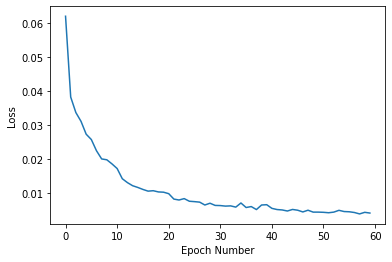

1/1 [==============================] - 0s 17ms/step


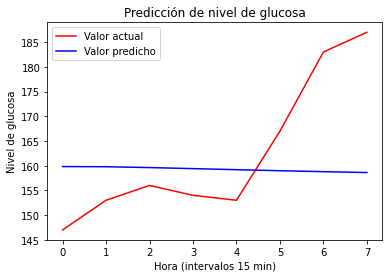

RMSE-->14.780052581623462 Rsquare-->-0.10888301683022505

**********lstmBidirectionalModel**************
Epoch 1/60
21/21 [==============================] - 18s 53ms/step - loss: 0.0408
Epoch 2/60
21/21 [==============================] - 1s 53ms/step - loss: 0.0217
Epoch 3/60
21/21 [==============================] - 1s 50ms/step - loss: 0.0125
Epoch 4/60
21/21 [==============================] - 1s 52ms/step - loss: 0.0125
Epoch 5/60
21/21 [==============================] - 1s 49ms/step - loss: 0.0115
Epoch 6/60
21/21 [==============================] - 1s 50ms/step - loss: 0.0137
Epoch 7/60
21/21 [==============================] - 1s 49ms/step - loss: 0.0137
Epoch 8/60
21/21 [==============================] - 1s 53ms/step - loss: 0.0092
Epoch 9/60
21/21 [==============================] - 2s 78ms/step - loss: 0.0084
Epoch 10/60
21/21 [==============================] - 1s 50ms/step - loss: 0.0091
Epoch 11/60
21/21 [==============================] - 1s 50ms/step - loss: 0.0075
Epoch 12/60


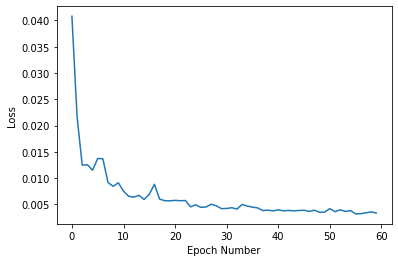

1/1 [==============================] - 0s 91ms/step


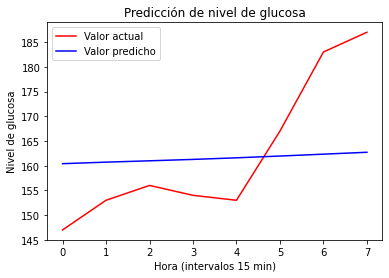

RMSE-->13.384983502493567 Rsquare-->0.09056962760393439



In [33]:
#34304(total rows) - 8(values to predict)= 3496
# 670 - 8
training_set = dfLIB193307Test.iloc[:662,].values
test_set = dfLIB193307Test.iloc[662:,].values

sc = MinMaxScaler(feature_range = (0,1))

training_set_scaled = sc.fit_transform(training_set)
test_set_scaled = sc.fit_transform(test_set)

X_train = []
y_train = []
WT = 16
WP = 8

for i in range(WT, len(training_set_scaled)):
    X_train.append(training_set_scaled[i-WT:i, 0:1])
    y_train.append(training_set_scaled[i, 0])
    
X_train, y_train = np.array(X_train), np.array(y_train)

lstmModel(X_train, y_train,WT,WP,training_set_scaled,test_set)
print('**********lstmBidirectionalModel**************')
lstmBidirectionalModel(X_train, y_train,WT,WP,training_set_scaled,test_set)

## 30 minutos

Epoch 1/60
21/21 [==============================] - 9s 46ms/step - loss: 0.0704
Epoch 2/60
21/21 [==============================] - 1s 34ms/step - loss: 0.0355
Epoch 3/60
21/21 [==============================] - 1s 31ms/step - loss: 0.0359
Epoch 4/60
21/21 [==============================] - 1s 31ms/step - loss: 0.0337
Epoch 5/60
21/21 [==============================] - 1s 30ms/step - loss: 0.0308
Epoch 6/60
21/21 [==============================] - 1s 30ms/step - loss: 0.0272
Epoch 7/60
21/21 [==============================] - 1s 32ms/step - loss: 0.0285
Epoch 8/60
21/21 [==============================] - 1s 31ms/step - loss: 0.0216
Epoch 9/60
21/21 [==============================] - 1s 31ms/step - loss: 0.0189
Epoch 10/60
21/21 [==============================] - 1s 29ms/step - loss: 0.0187
Epoch 11/60
21/21 [==============================] - 1s 30ms/step - loss: 0.0162
Epoch 12/60
21/21 [==============================] - 1s 30ms/step - loss: 0.0137
Epoch 13/60
21/21 [==================

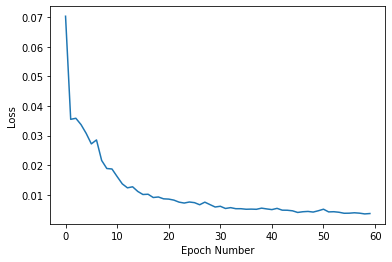

1/1 [==============================] - 0s 18ms/step


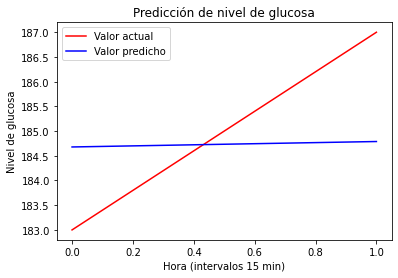

RMSE-->1.963054522064048 Rsquare-->0.036604235850973055

**********lstmBidirectionalModel**************
Epoch 1/60
21/21 [==============================] - 14s 49ms/step - loss: 0.0548
Epoch 2/60
21/21 [==============================] - 1s 49ms/step - loss: 0.0245
Epoch 3/60
21/21 [==============================] - 1s 50ms/step - loss: 0.0179
Epoch 4/60
21/21 [==============================] - 1s 50ms/step - loss: 0.0134
Epoch 5/60
21/21 [==============================] - 1s 50ms/step - loss: 0.0112
Epoch 6/60
21/21 [==============================] - 1s 49ms/step - loss: 0.0110
Epoch 7/60
21/21 [==============================] - 1s 49ms/step - loss: 0.0086
Epoch 8/60
21/21 [==============================] - 1s 50ms/step - loss: 0.0090
Epoch 9/60
21/21 [==============================] - 1s 49ms/step - loss: 0.0074
Epoch 10/60
21/21 [==============================] - 1s 50ms/step - loss: 0.0079
Epoch 11/60
21/21 [==============================] - 1s 51ms/step - loss: 0.0073
Epoch 12/60
2

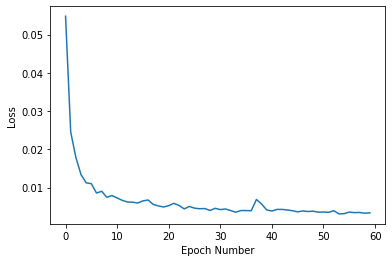

1/1 [==============================] - 0s 19ms/step


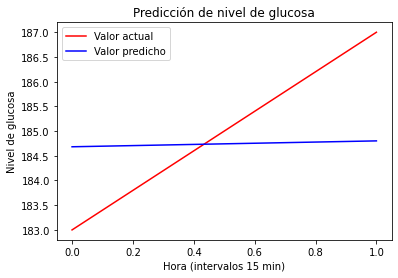

RMSE-->1.9575229744893994 Rsquare-->0.0420259510865435



In [34]:
#670 - 2 
training_set = dfLIB193307Test.iloc[:668,].values
test_set = dfLIB193307Test.iloc[668:,].values

sc = MinMaxScaler(feature_range = (0,1))

training_set_scaled = sc.fit_transform(training_set)
test_set_scaled = sc.fit_transform(test_set)

X_train = []
y_train = []
WT = 16
WP = 2

for i in range(WT, len(training_set_scaled)):
    X_train.append(training_set_scaled[i-WT:i, 0:1])
    y_train.append(training_set_scaled[i, 0])
    
X_train, y_train = np.array(X_train), np.array(y_train)  

lstmModel(X_train, y_train,WT,WP,training_set_scaled,test_set)
print('**********lstmBidirectionalModel**************')
lstmBidirectionalModel(X_train, y_train,WT,WP,training_set_scaled,test_set)

# LIB193307 Segundo escenario

## 2 horas

In [35]:
dfLIB193307Test2 = dfLIB193307Test2[['TimeOfDay', 'hour', 'dayofweek', 'quarter', 'month','year','dayofyear','dayofmonth','weekofyear','Glucose level']]
dfLIB193307Test2['TimeOfDay'] = LabelEncoder().fit_transform(dfLIB193307Test2['TimeOfDay'])

Epoch 1/60
21/21 [==============================] - 6s 29ms/step - loss: 0.0561
Epoch 2/60
21/21 [==============================] - 1s 31ms/step - loss: 0.0364
Epoch 3/60
21/21 [==============================] - 1s 30ms/step - loss: 0.0318
Epoch 4/60
21/21 [==============================] - 1s 30ms/step - loss: 0.0326
Epoch 5/60
21/21 [==============================] - 1s 30ms/step - loss: 0.0338
Epoch 6/60
21/21 [==============================] - 1s 29ms/step - loss: 0.0287
Epoch 7/60
21/21 [==============================] - 1s 29ms/step - loss: 0.0256
Epoch 8/60
21/21 [==============================] - 1s 30ms/step - loss: 0.0204
Epoch 9/60
21/21 [==============================] - 1s 29ms/step - loss: 0.0204
Epoch 10/60
21/21 [==============================] - 1s 31ms/step - loss: 0.0180
Epoch 11/60
21/21 [==============================] - 1s 32ms/step - loss: 0.0166
Epoch 12/60
21/21 [==============================] - 1s 31ms/step - loss: 0.0159
Epoch 13/60
21/21 [==================

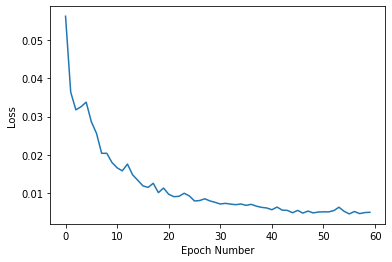

1/1 [==============================] - 0s 29ms/step


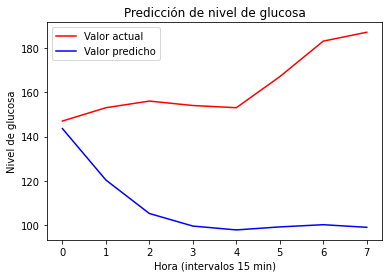

MAPE-->32.92826592704054 RMSE-->59.95189908938603

**********lstmBidirectionalModel**************

Epoch 1/60
21/21 [==============================] - 15s 52ms/step - loss: 0.0547
Epoch 2/60
21/21 [==============================] - 1s 51ms/step - loss: 0.0243
Epoch 3/60
21/21 [==============================] - 1s 51ms/step - loss: 0.0202
Epoch 4/60
21/21 [==============================] - 1s 52ms/step - loss: 0.0141
Epoch 5/60
21/21 [==============================] - 1s 52ms/step - loss: 0.0116
Epoch 6/60
21/21 [==============================] - 1s 69ms/step - loss: 0.0109
Epoch 7/60
21/21 [==============================] - 2s 113ms/step - loss: 0.0090
Epoch 8/60
21/21 [==============================] - 1s 60ms/step - loss: 0.0095
Epoch 9/60
21/21 [==============================] - 3s 126ms/step - loss: 0.0093
Epoch 10/60
21/21 [==============================] - 1s 65ms/step - loss: 0.0105
Epoch 11/60
21/21 [==============================] - 2s 78ms/step - loss: 0.0097
Epoch 12/60
21/2

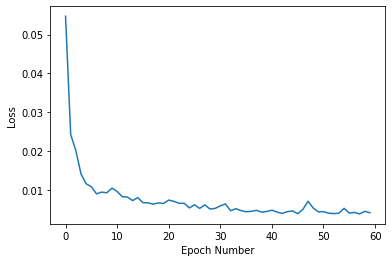

1/1 [==============================] - 0s 21ms/step


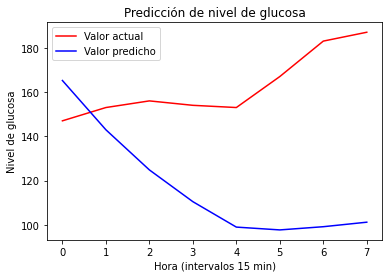

MAPE-->28.4302267859348 RMSE-->56.339126986916874



In [36]:
training_set = dfLIB193307Test2.iloc[:662,0:10].values
test_set = dfLIB193307Test2.iloc[662:,0:10].values

sc = MinMaxScaler(feature_range = (0,1))

training_set_scaled = sc.fit_transform(training_set)
test_set_scaled = sc.fit_transform(test_set)

test_set_scaled = test_set_scaled[:, 0:9]

X_train = []
y_train = []
WT = 16
WP = 8

for i in range(WT, len(training_set_scaled)):
    X_train.append(training_set_scaled[i-WT:i, 0:10])
    y_train.append(training_set_scaled[i,-1])
    
X_train, y_train = np.array(X_train), np.array(y_train)

X_train = np.reshape(X_train,(X_train.shape[0], X_train.shape[1], 10))

lstmMVModel(X_train, y_train,training_set,training_set_scaled,WT,WP,test_set_scaled,test_set)
print('**********lstmBidirectionalModel**************\n')
lstmMVBidirectionalModel(X_train, y_train,training_set,training_set_scaled,WT,WP,test_set_scaled,test_set)

## 30 minutos

Epoch 1/60
21/21 [==============================] - 9s 29ms/step - loss: 0.0666
Epoch 2/60
21/21 [==============================] - 1s 30ms/step - loss: 0.0372
Epoch 3/60
21/21 [==============================] - 1s 30ms/step - loss: 0.0339
Epoch 4/60
21/21 [==============================] - 1s 32ms/step - loss: 0.0299
Epoch 5/60
21/21 [==============================] - 1s 29ms/step - loss: 0.0298
Epoch 6/60
21/21 [==============================] - 1s 28ms/step - loss: 0.0306
Epoch 7/60
21/21 [==============================] - 1s 31ms/step - loss: 0.0315
Epoch 8/60
21/21 [==============================] - 1s 29ms/step - loss: 0.0261
Epoch 9/60
21/21 [==============================] - 1s 30ms/step - loss: 0.0217
Epoch 10/60
21/21 [==============================] - 1s 29ms/step - loss: 0.0216
Epoch 11/60
21/21 [==============================] - 1s 30ms/step - loss: 0.0180
Epoch 12/60
21/21 [==============================] - 1s 31ms/step - loss: 0.0174
Epoch 13/60
21/21 [==================

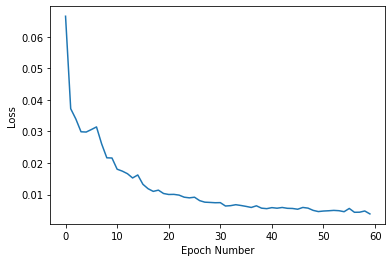

1/1 [==============================] - 0s 34ms/step


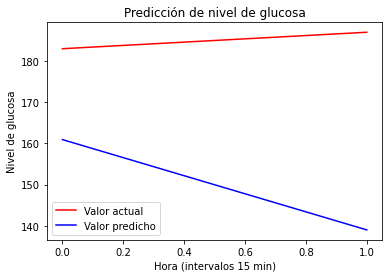

MAPE-->18.935718627226965 RMSE-->37.372158416202275

**********lstmBidirectionalModel**************

Epoch 1/60
21/21 [==============================] - 17s 56ms/step - loss: 0.0426
Epoch 2/60
21/21 [==============================] - 3s 143ms/step - loss: 0.0253
Epoch 3/60
21/21 [==============================] - 2s 90ms/step - loss: 0.0161
Epoch 4/60
21/21 [==============================] - 2s 95ms/step - loss: 0.0129
Epoch 5/60
21/21 [==============================] - 1s 50ms/step - loss: 0.0123
Epoch 6/60
21/21 [==============================] - 1s 51ms/step - loss: 0.0104
Epoch 7/60
21/21 [==============================] - 1s 50ms/step - loss: 0.0101
Epoch 8/60
21/21 [==============================] - 1s 51ms/step - loss: 0.0129
Epoch 9/60
21/21 [==============================] - 1s 51ms/step - loss: 0.0098
Epoch 10/60
21/21 [==============================] - 1s 51ms/step - loss: 0.0098
Epoch 11/60
21/21 [==============================] - 1s 52ms/step - loss: 0.0082
Epoch 12/60
21/

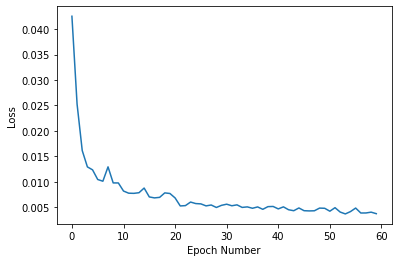

1/1 [==============================] - 0s 22ms/step


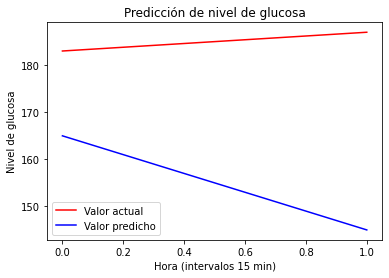

MAPE-->16.27256310329937 RMSE-->32.436838669761855



In [38]:
training_set = dfLIB193307Test2.iloc[:668,0:10].values
test_set = dfLIB193307Test2.iloc[668:,0:10].values

sc = MinMaxScaler(feature_range = (0,1))

training_set_scaled = sc.fit_transform(training_set)
test_set_scaled = sc.fit_transform(test_set)

test_set_scaled = test_set_scaled[:, 0:9]

X_train = []
y_train = []
WT = 16
WP = 2

for i in range(WT, len(training_set_scaled)):
    X_train.append(training_set_scaled[i-WT:i, 0:10])
    y_train.append(training_set_scaled[i,-1])
    
X_train, y_train = np.array(X_train), np.array(y_train)

X_train = np.reshape(X_train,(X_train.shape[0], X_train.shape[1], 10))

lstmMVModel(X_train, y_train,training_set,training_set_scaled,WT,WP,test_set_scaled,test_set)
print('**********lstmBidirectionalModel**************\n')
lstmMVBidirectionalModel(X_train, y_train,training_set,training_set_scaled,WT,WP,test_set_scaled,test_set)

# LIB193277 Primer escenario

## 2 horas

Epoch 1/60
21/21 [==============================] - 8s 30ms/step - loss: 0.0586
Epoch 2/60
21/21 [==============================] - 1s 31ms/step - loss: 0.0302
Epoch 3/60
21/21 [==============================] - 1s 29ms/step - loss: 0.0278
Epoch 4/60
21/21 [==============================] - 1s 32ms/step - loss: 0.0275
Epoch 5/60
21/21 [==============================] - 1s 30ms/step - loss: 0.0280
Epoch 6/60
21/21 [==============================] - 1s 29ms/step - loss: 0.0263
Epoch 7/60
21/21 [==============================] - 1s 29ms/step - loss: 0.0249
Epoch 8/60
21/21 [==============================] - 1s 30ms/step - loss: 0.0239
Epoch 9/60
21/21 [==============================] - 1s 30ms/step - loss: 0.0228
Epoch 10/60
21/21 [==============================] - 1s 31ms/step - loss: 0.0213
Epoch 11/60
21/21 [==============================] - 1s 30ms/step - loss: 0.0190
Epoch 12/60
21/21 [==============================] - 1s 29ms/step - loss: 0.0190
Epoch 13/60
21/21 [==================

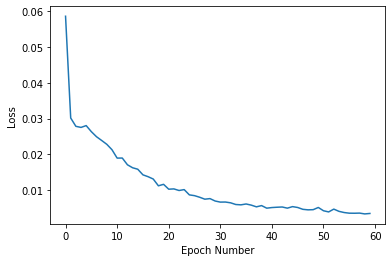

1/1 [==============================] - 0s 23ms/step


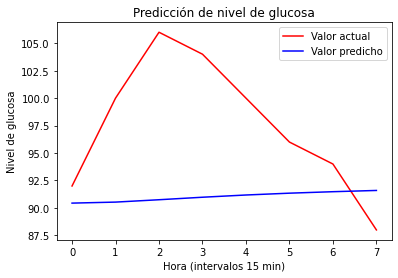

RMSE-->8.753799774705563 Rsquare-->-1.3398171143705393

**********lstmBidirectionalModel**************
Epoch 1/60
21/21 [==============================] - 14s 49ms/step - loss: 0.0490
Epoch 2/60
21/21 [==============================] - 1s 49ms/step - loss: 0.0227
Epoch 3/60
21/21 [==============================] - 1s 49ms/step - loss: 0.0173
Epoch 4/60
21/21 [==============================] - 1s 51ms/step - loss: 0.0151
Epoch 5/60
21/21 [==============================] - 1s 50ms/step - loss: 0.0177
Epoch 6/60
21/21 [==============================] - 1s 49ms/step - loss: 0.0152
Epoch 7/60
21/21 [==============================] - 1s 49ms/step - loss: 0.0118
Epoch 8/60
21/21 [==============================] - 1s 51ms/step - loss: 0.0105
Epoch 9/60
21/21 [==============================] - 1s 50ms/step - loss: 0.0131
Epoch 10/60
21/21 [==============================] - 1s 49ms/step - loss: 0.0119
Epoch 11/60
21/21 [==============================] - 1s 49ms/step - loss: 0.0095
Epoch 12/60
21

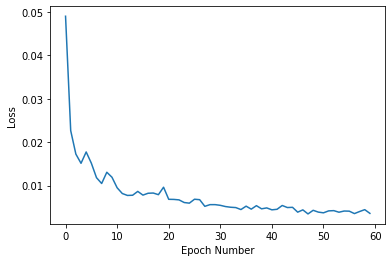

1/1 [==============================] - 0s 17ms/step


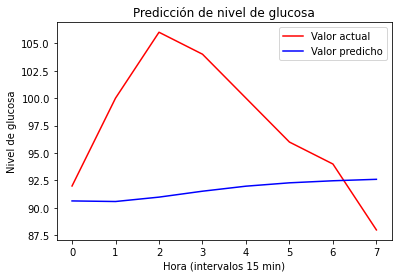

RMSE-->8.464000212349887 Rsquare-->-1.187459529607907



In [39]:
#34304(total rows) - 8(values to predict)= 3496
# 671 - 8
training_set = dfLIB193277Test.iloc[:663,].values
test_set = dfLIB193277Test.iloc[663:,].values

sc = MinMaxScaler(feature_range = (0,1))

training_set_scaled = sc.fit_transform(training_set)
test_set_scaled = sc.fit_transform(test_set)

X_train = []
y_train = []
WT = 16
WP = 8

for i in range(WT, len(training_set_scaled)):
    X_train.append(training_set_scaled[i-WT:i, 0:1])
    y_train.append(training_set_scaled[i, 0])
    
X_train, y_train = np.array(X_train), np.array(y_train)

lstmModel(X_train, y_train,WT,WP,training_set_scaled,test_set)
print('**********lstmBidirectionalModel**************')
lstmBidirectionalModel(X_train, y_train,WT,WP,training_set_scaled,test_set)

## 30 minutos

Epoch 1/60
21/21 [==============================] - 7s 28ms/step - loss: 0.0596
Epoch 2/60
21/21 [==============================] - 1s 30ms/step - loss: 0.0301
Epoch 3/60
21/21 [==============================] - 1s 29ms/step - loss: 0.0278
Epoch 4/60
21/21 [==============================] - 1s 32ms/step - loss: 0.0273
Epoch 5/60
21/21 [==============================] - 1s 31ms/step - loss: 0.0255
Epoch 6/60
21/21 [==============================] - 1s 28ms/step - loss: 0.0250
Epoch 7/60
21/21 [==============================] - 1s 31ms/step - loss: 0.0242
Epoch 8/60
21/21 [==============================] - 1s 31ms/step - loss: 0.0219
Epoch 9/60
21/21 [==============================] - 1s 31ms/step - loss: 0.0214
Epoch 10/60
21/21 [==============================] - 1s 30ms/step - loss: 0.0199
Epoch 11/60
21/21 [==============================] - 1s 30ms/step - loss: 0.0188
Epoch 12/60
21/21 [==============================] - 1s 28ms/step - loss: 0.0172
Epoch 13/60
21/21 [==================

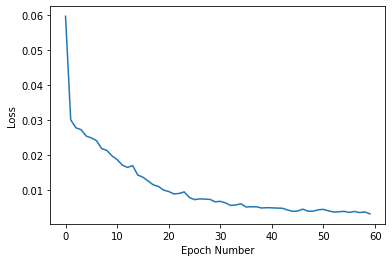

1/1 [==============================] - 0s 18ms/step


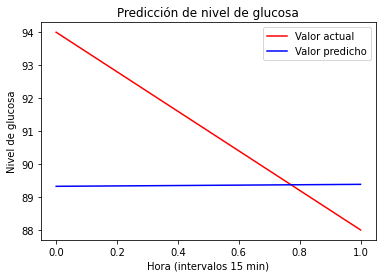

RMSE-->3.448484386511062 Rsquare-->-0.3213382848900639

**********lstmBidirectionalModel**************
Epoch 1/60
21/21 [==============================] - 15s 49ms/step - loss: 0.0449
Epoch 2/60
21/21 [==============================] - 1s 53ms/step - loss: 0.0204
Epoch 3/60
21/21 [==============================] - 1s 51ms/step - loss: 0.0170
Epoch 4/60
21/21 [==============================] - 1s 48ms/step - loss: 0.0131
Epoch 5/60
21/21 [==============================] - 1s 50ms/step - loss: 0.0131
Epoch 6/60
21/21 [==============================] - 1s 50ms/step - loss: 0.0114
Epoch 7/60
21/21 [==============================] - 1s 52ms/step - loss: 0.0117
Epoch 8/60
21/21 [==============================] - 1s 49ms/step - loss: 0.0103
Epoch 9/60
21/21 [==============================] - 1s 51ms/step - loss: 0.0101
Epoch 10/60
21/21 [==============================] - 1s 51ms/step - loss: 0.0092
Epoch 11/60
21/21 [==============================] - 1s 49ms/step - loss: 0.0091
Epoch 12/60
21

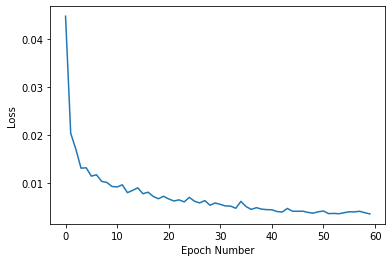

1/1 [==============================] - 0s 23ms/step


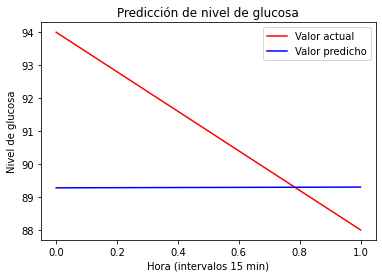

RMSE-->3.463573032276211 Rsquare-->-0.33292646110122504



In [40]:
#34304(total rows) - 8(values to predict)= 3496
# 671 - 8
training_set = dfLIB193277Test.iloc[:669,].values
test_set = dfLIB193277Test.iloc[669:,].values

sc = MinMaxScaler(feature_range = (0,1))

training_set_scaled = sc.fit_transform(training_set)
test_set_scaled = sc.fit_transform(test_set)

X_train = []
y_train = []
WT = 16
WP = 2

for i in range(WT, len(training_set_scaled)):
    X_train.append(training_set_scaled[i-WT:i, 0:1])
    y_train.append(training_set_scaled[i, 0])
    
X_train, y_train = np.array(X_train), np.array(y_train)

lstmModel(X_train, y_train,WT,WP,training_set_scaled,test_set)
print('**********lstmBidirectionalModel**************')
lstmBidirectionalModel(X_train, y_train,WT,WP,training_set_scaled,test_set)

# LIB193277 Segundo escenario

## 2 horas

In [41]:
dfLIB193277Test2 = dfLIB193277Test2[['TimeOfDay', 'hour', 'dayofweek', 'quarter', 'month','year','dayofyear','dayofmonth','weekofyear','Glucose level']]
dfLIB193277Test2['TimeOfDay'] = LabelEncoder().fit_transform(dfLIB193277Test2['TimeOfDay'])

Epoch 1/60
21/21 [==============================] - 6s 30ms/step - loss: 0.0519
Epoch 2/60
21/21 [==============================] - 1s 30ms/step - loss: 0.0285
Epoch 3/60
21/21 [==============================] - 1s 32ms/step - loss: 0.0254
Epoch 4/60
21/21 [==============================] - 1s 30ms/step - loss: 0.0255
Epoch 5/60
21/21 [==============================] - 1s 32ms/step - loss: 0.0250
Epoch 6/60
21/21 [==============================] - 1s 30ms/step - loss: 0.0216
Epoch 7/60
21/21 [==============================] - 1s 31ms/step - loss: 0.0216
Epoch 8/60
21/21 [==============================] - 1s 30ms/step - loss: 0.0219
Epoch 9/60
21/21 [==============================] - 1s 31ms/step - loss: 0.0213
Epoch 10/60
21/21 [==============================] - 1s 29ms/step - loss: 0.0203
Epoch 11/60
21/21 [==============================] - 1s 33ms/step - loss: 0.0189
Epoch 12/60
21/21 [==============================] - 1s 32ms/step - loss: 0.0179
Epoch 13/60
21/21 [==================

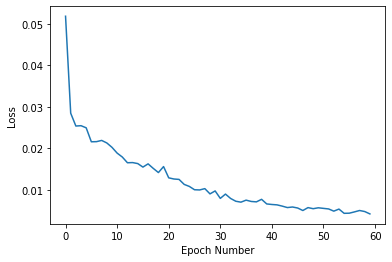

1/1 [==============================] - 0s 20ms/step


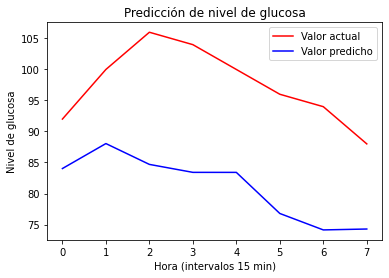

MAPE-->16.53639978292526 RMSE-->17.001444025488173

**********lstmBidirectionalModel**************

Epoch 1/60
21/21 [==============================] - 15s 54ms/step - loss: 0.0469
Epoch 2/60
21/21 [==============================] - 1s 52ms/step - loss: 0.0219
Epoch 3/60
21/21 [==============================] - 1s 53ms/step - loss: 0.0171
Epoch 4/60
21/21 [==============================] - 1s 53ms/step - loss: 0.0166
Epoch 5/60
21/21 [==============================] - 1s 53ms/step - loss: 0.0139
Epoch 6/60
21/21 [==============================] - 1s 53ms/step - loss: 0.0135
Epoch 7/60
21/21 [==============================] - 1s 52ms/step - loss: 0.0108
Epoch 8/60
21/21 [==============================] - 1s 53ms/step - loss: 0.0116
Epoch 9/60
21/21 [==============================] - 1s 51ms/step - loss: 0.0119
Epoch 10/60
21/21 [==============================] - 1s 54ms/step - loss: 0.0101
Epoch 11/60
21/21 [==============================] - 1s 53ms/step - loss: 0.0102
Epoch 12/60
21/21

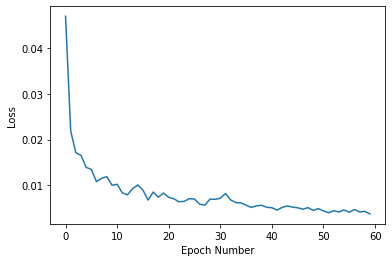

1/1 [==============================] - 0s 18ms/step


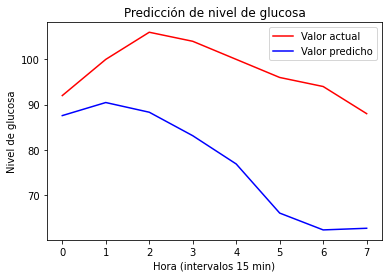

MAPE-->20.68059479186347 RMSE-->22.19460209076828



In [42]:
training_set = dfLIB193277Test2.iloc[:663,0:10].values
test_set = dfLIB193277Test2.iloc[663:,0:10].values

sc = MinMaxScaler(feature_range = (0,1))

training_set_scaled = sc.fit_transform(training_set)
test_set_scaled = sc.fit_transform(test_set)

test_set_scaled = test_set_scaled[:, 0:9]

X_train = []
y_train = []
WT = 16
WP = 8

for i in range(WT, len(training_set_scaled)):
    X_train.append(training_set_scaled[i-WT:i, 0:10])
    y_train.append(training_set_scaled[i,-1])
    
X_train, y_train = np.array(X_train), np.array(y_train)

X_train = np.reshape(X_train,(X_train.shape[0], X_train.shape[1], 10))

lstmMVModel(X_train, y_train,training_set,training_set_scaled,WT,WP,test_set_scaled,test_set)
print('**********lstmBidirectionalModel**************\n')
lstmMVBidirectionalModel(X_train, y_train,training_set,training_set_scaled,WT,WP,test_set_scaled,test_set)

## 30 minutos

Epoch 1/60
21/21 [==============================] - 8s 29ms/step - loss: 0.0504
Epoch 2/60
21/21 [==============================] - 1s 29ms/step - loss: 0.0288
Epoch 3/60
21/21 [==============================] - 1s 32ms/step - loss: 0.0247
Epoch 4/60
21/21 [==============================] - 1s 30ms/step - loss: 0.0234
Epoch 5/60
21/21 [==============================] - 1s 29ms/step - loss: 0.0210
Epoch 6/60
21/21 [==============================] - 1s 30ms/step - loss: 0.0215
Epoch 7/60
21/21 [==============================] - 1s 29ms/step - loss: 0.0223
Epoch 8/60
21/21 [==============================] - 1s 31ms/step - loss: 0.0198
Epoch 9/60
21/21 [==============================] - 1s 33ms/step - loss: 0.0205
Epoch 10/60
21/21 [==============================] - 1s 32ms/step - loss: 0.0185
Epoch 11/60
21/21 [==============================] - 1s 30ms/step - loss: 0.0178
Epoch 12/60
21/21 [==============================] - 1s 30ms/step - loss: 0.0182
Epoch 13/60
21/21 [==================

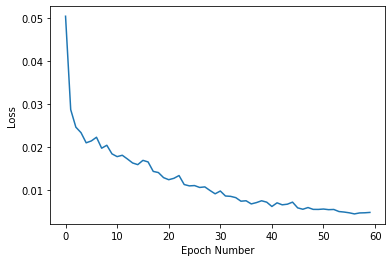

1/1 [==============================] - 0s 15ms/step


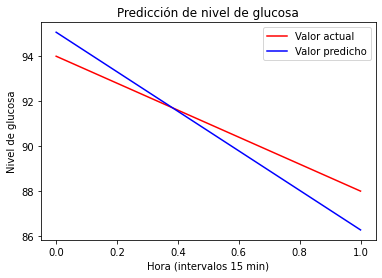

MAPE-->4.837019623363503 RMSE-->1.4352368648138596

**********lstmBidirectionalModel**************

Epoch 1/60
21/21 [==============================] - 14s 48ms/step - loss: 0.0470
Epoch 2/60
21/21 [==============================] - 1s 52ms/step - loss: 0.0207
Epoch 3/60
21/21 [==============================] - 1s 49ms/step - loss: 0.0170
Epoch 4/60
21/21 [==============================] - 1s 47ms/step - loss: 0.0146
Epoch 5/60
21/21 [==============================] - 1s 52ms/step - loss: 0.0135
Epoch 6/60
21/21 [==============================] - 1s 49ms/step - loss: 0.0126
Epoch 7/60
21/21 [==============================] - 1s 48ms/step - loss: 0.0111
Epoch 8/60
21/21 [==============================] - 1s 50ms/step - loss: 0.0113
Epoch 9/60
21/21 [==============================] - 1s 50ms/step - loss: 0.0103
Epoch 10/60
21/21 [==============================] - 1s 54ms/step - loss: 0.0096
Epoch 11/60
21/21 [==============================] - 1s 50ms/step - loss: 0.0097
Epoch 12/60
21/21

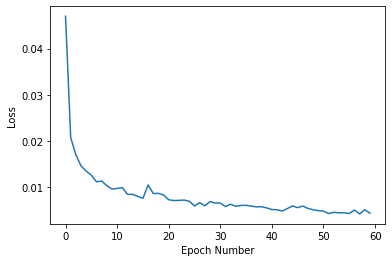

1/1 [==============================] - 0s 22ms/step


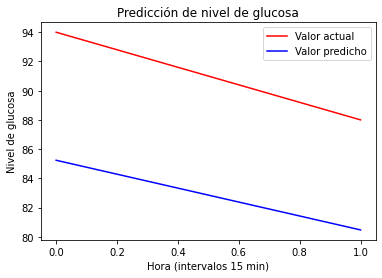

MAPE-->8.856300874189897 RMSE-->8.17260487164692



In [43]:
training_set = dfLIB193277Test2.iloc[:669,0:10].values
test_set = dfLIB193277Test2.iloc[669:,0:10].values

sc = MinMaxScaler(feature_range = (0,1))

training_set_scaled = sc.fit_transform(training_set)
test_set_scaled = sc.fit_transform(test_set)

test_set_scaled = test_set_scaled[:, 0:9]

X_train = []
y_train = []
WT = 16
WP = 2

for i in range(WT, len(training_set_scaled)):
    X_train.append(training_set_scaled[i-WT:i, 0:10])
    y_train.append(training_set_scaled[i,-1])
    
X_train, y_train = np.array(X_train), np.array(y_train)

X_train = np.reshape(X_train,(X_train.shape[0], X_train.shape[1], 10))

lstmMVModel(X_train, y_train,training_set,training_set_scaled,WT,WP,test_set_scaled,test_set)
print('**********lstmBidirectionalModel**************\n')
lstmMVBidirectionalModel(X_train, y_train,training_set,training_set_scaled,WT,WP,test_set_scaled,test_set)